### Data Download and Setup

In [ ]:
import pandas as pd
import numpy as np
import os
from requests import get


In [ ]:
train_data_page = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
test_data_page = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.testdata.unlabeled_10_percent.gz"
labels ="http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names"
datadir = "data"

In [ ]:


# Download training data
print("Downloading Training Data")
os.system("wget " + train_data_page)
training_file_name = train_data_page.split("/")[-1].replace(".gz","")
os.system("gunzip " + training_file_name )
with open(training_file_name, "r+") as ff:
  lines = [i.strip().split(",") for i in ff.readlines()]
ff.close()

# Download training column labels 
print("Downloading Training Labels")
response = get(labels)
labels = response.text
labels = [i.split(",")[0].split(":") for i in labels.split("\n")]
labels = [i for i in labels if i[0]!='']
final_labels = labels[1::]



In [ ]:
# Constructing Dataframe
data = pd.DataFrame(lines)
labels = final_labels
data.columns = [i[0] for i in labels]+['target']

for i in range(len(labels)):
  if labels[i][1] == ' continuous.':
    data.iloc[:,i] = data.iloc[:,i].astype(float)

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0.0,tcp,http,SF,181.0,5450.0,0,0.0,0.0,0.0,...,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0.0,tcp,http,SF,239.0,486.0,0,0.0,0.0,0.0,...,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0.0,tcp,http,SF,235.0,1337.0,0,0.0,0.0,0.0,...,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0.0,tcp,http,SF,219.0,1337.0,0,0.0,0.0,0.0,...,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0.0,tcp,http,SF,217.0,2032.0,0,0.0,0.0,0.0,...,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
data['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

### Z-Score

In [ ]:
# Sample the data for suitable anomaly detection

data_resampled = data.loc[data["target"].isin(["normal.","teardrop."])]

def map_label(target):
  if target == "normal.":
    return 0
  return 1

data_resampled["Label"] = data_resampled["target"].apply(map_label)

<ipython-input-5-cf00b24b900f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["Label"] = data4["target"].apply(map_label)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
Label,,,,,,,,,,,,,,,,,,,,,
0,97278,97278,97278,97278,97278,97278,97278,97278,97278,97278,...,97278,97278,97278,97278,97278,97278,97278,97278,97278,97278
1,979,979,979,979,979,979,979,979,979,979,...,979,979,979,979,979,979,979,979,979,979


In [ ]:
mu = data_resampled['wrong_fragment'].mean()
sigma = data_resampled ['wrong_fragment'].std()
data_resampled["Z"] = (data_resampled ['wrong_fragment'] – mu) / sigma


               wrong_fragment  target      z
Label Z_Label                               
0     0                 97278   97278  97278
1     1                   979     979    979


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
data_resampled["Z"].plot.density()

In [ ]:
 def map_z_to_label(z):
    if z > 2 or z < -2:
      return 1
    return 0

data_resampled["Predicted_Label"] = data_resampled["Z"].apply(map_z_to_label)


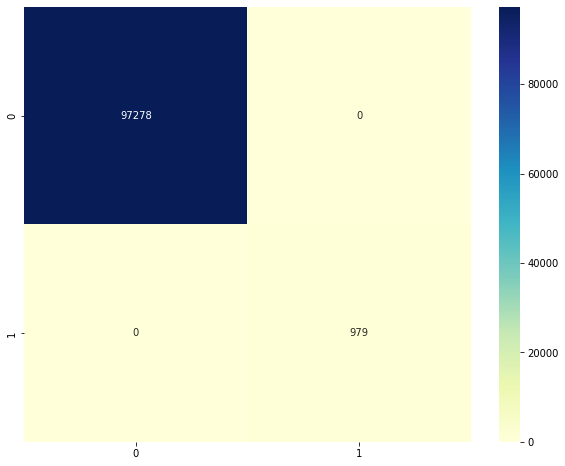

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

confusion = confusion_matrix(data_resampled["Label"], data_resampled["Z_Label"])
plt.figure(figsize = (10,8))
sns.heatmap(confusion, annot = True, fmt = 'd', cmap="YlGnBu")


### Elliptic Envelope

In [ ]:
from sklearn.covariance import EllipticEnvelope
actual_labels = data_resampled["Label"]
X = data_resampled.drop(["Label", "target",
                "protocol_type", "service",
                "flag"], axis=1)


clf = EllipticEnvelope(contamination=.1,random_state=0)
clf.fit(X)
predicted_labels = clf.predict(X)

In [ ]:
predicted_labels_rescored = [1 if pred == -1 else 0 for pred in predicted_labels]

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

confusion = confusion_matrix(actual_labels, predicted_labels_rescored)
plt.figure(figsize = (10,8))
sns.heatmap(confusion, annot = True, fmt = 'd', cmap="YlGnBu")

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
actual_labels = data_resampled["Label"]
X = data_resampled.drop(["Label", "target",
                "protocol_type", "service",
                "flag"], axis=1)

clf = IsolationForest(random_state=0).fit(X)
predicted_labels = clf.predict(X)

predicted_labels[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
predicted_labels_rescored = [1 if pred == -1 else 0 for pred in predicted_labels]

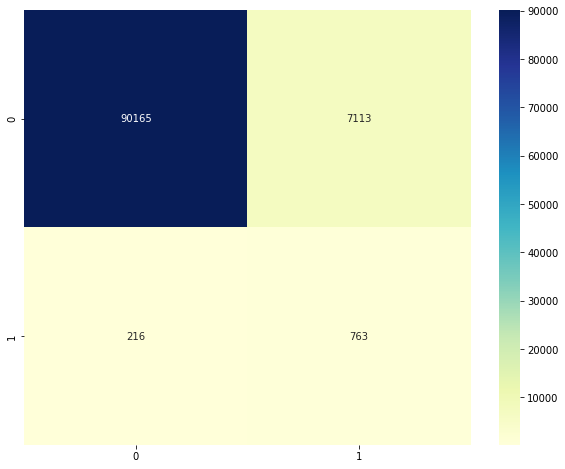

In [ ]:
confusion = confusion_matrix(actual_labels, predicted_labels_rescored)
plt.figure(figsize = (10,8))
sns.heatmap(confusion, annot = True, fmt = 'd', cmap="YlGnBu")

### Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
actual_labels = data_resampled["Label"]
X = data_resampled.drop(["Label", "target",
 "protocol_type", "service",
 "flag"], axis=1)
k = 5
clf = LocalOutlierFactor(n_neighbors=k, contamination=.1)
predicted_labels = clf.fit_predict(X)


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
actual_labels = data_resampled["Label"]
X = data_resampled.drop(["Label", "target",
                "protocol_type", "service",
                "flag"], axis=1)
all_accuracies = []
all_precision = []
all_recall = []
all_k = []
total_num_examples = len(X)
start_k = 100
end_k = 3000

for k in range(start_k, end_k,100): 
  print("Checking for k = {}".format(k))

  # Fit a model
  clf = LocalOutlierFactor(n_neighbors=k, contamination=.1)
  predicted_labels = clf.fit_predict(X)
  predicted_labels_rescored = [1 if pred == -1 else 0 for pred in predicted_labels]
  confusion = confusion_matrix(actual_labels, predicted_labels_rescored)

  # Calculate metrics
  accuracy = 100 * (confusion[0][0] + confusion[1][1]) / total_num_examples
  precision = 100 * (confusion[1][1])/(confusion[1][1] + confusion[1][0] + 1)
  recall = 100 * (confusion[1][1])/(confusion[1][1] + confusion[0][1] + 1)

  # Record metrics
  all_k.append(k)
  all_accuracies.append(accuracy)
  all_precision.append(precision)
  all_recall.append(recall)

Checking for k = 100
Checking for k = 200
Checking for k = 300
Checking for k = 400
Checking for k = 500
Checking for k = 600
Checking for k = 700
Checking for k = 800
Checking for k = 900
Checking for k = 1000
Checking for k = 1100
Checking for k = 1200
Checking for k = 1300
Checking for k = 1400
Checking for k = 1500
Checking for k = 1600
Checking for k = 1700
Checking for k = 1800
Checking for k = 1900
Checking for k = 2000
Checking for k = 2100
Checking for k = 2200
Checking for k = 2300
Checking for k = 2400
Checking for k = 2500
Checking for k = 2600
Checking for k = 2700
Checking for k = 2800
Checking for k = 2900


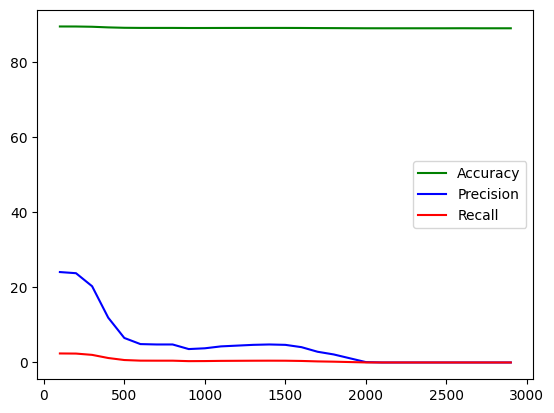

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_k, all_accuracies, color='green', label = 'Accuracy')
plt.plot(all_k, all_precision, color='blue', label = 'Precision')
plt.plot(all_k, all_recall, color='red', label = 'Recall')
plt.legend()
plt.show()

### DBSCAN

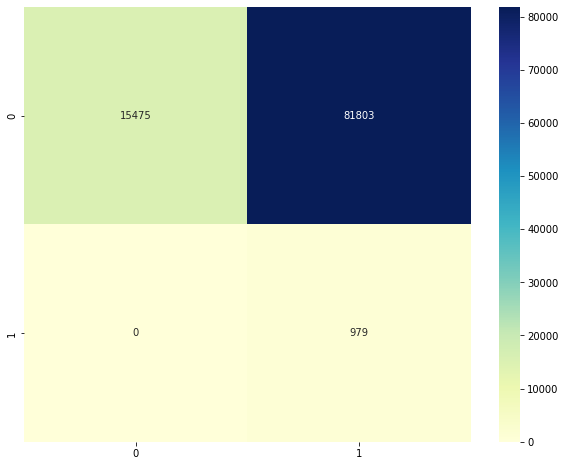

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor
actual_labels = data_resampled["Label"]
X = data_resampled.drop(["Label", "target",
                "protocol_type", "service",
                "flag"], axis=1)

epsilon = 0.2
minimum_samples = 5

clf = DBSCAN(
 eps = epsilon,  
 min_samples = minimum_samples)

predicted_labels = outlier_detection.fit_predict(X)
predicted_labels_rescored = [1 if pred == -1 else 0 for pred in predicted_labels]


### Once Class SVM

In [ ]:
from sklearn import svm

actual_labels = data_resampled["Label"]
X = data_resampled.drop(["Label", "target",
                "protocol_type", "service",
                "flag"], axis=1)

clf=svm.OneClassSVM(kernel="rbf")
clf.fit(X)
predicted_labels = clf.predict(X)

### Autoencoder

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

actual_labels = data_resampled["Label"]
X = data_resampled.drop(["Label", "target",
                "protocol_type", "service",
                "flag"], axis=1)

 

X_train, X_test, y_train, y_test = train_test_split(X, actual_labels, test_size=0.33, random_state=42, stratify=actual_labels)

X_train = np.array(X_train, dtype=np.float)
X_test= np.array(X_test, dtype=np.float)


65832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 38)]              0         
                                                                 
 dense_72 (Dense)            (None, 30)                1170      
                                                                 
 dense_73 (Dense)            (None, 16)                496       
                                                                 
 dense_74 (Dense)            (None, 8)                 136       
                                                                 
 dense_75 (Dense)            (None, 16)                144       
                                                                 
 dense_76 (Dense)            (None, 30)                510       
                                                                 
 dense_77 (Dense)            (None, 38)                117

In [ ]:
input = keras.Input(shape=(X_train.shape[1],))
encoded = layers.Dense(30, activation='relu')(input)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)

In [ ]:
decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(30, activation='relu')(decoded)
decoded = layers.Dense(X_train.shape[1], activation='sigmoid')(encoded)

In [ ]:
autoencoder = keras.Model(input, decoded)


In [ ]:
# Encoder
encoder = keras.Model(input_img, encoded)

# Decoder
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input,
decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

In [ ]:
autoencoder.fit(X_train, X_train,
 epochs=10,
 batch_size=256,
 shuffle=True

In [ ]:
from sklearn.metrics import mean_squared_error
predicted = autoencoder.predict(X_test)
errors = [np.linalg.norm(X_test[idx] - predicted[idx]) for idx in range(X_test.shape[0])]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


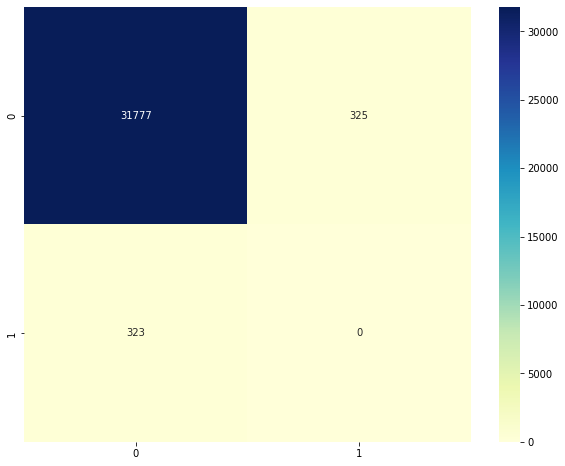

In [ ]:
thresh = np.percentile(errors, 99)

predicted_labels = [1 if errors[idx] > thresh else 0 for idx in range(X_test.shape[0])]
